# Block 5 Exercise 1: Classification

# By Christian Wegert

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

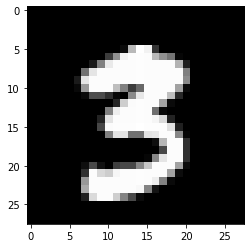

In [7]:
plt.imshow(np.reshape(X_train[50,:],(28,28)), cmap='gray')

In [8]:
print("Sollwert:")
print(y_train[50])

Sollwert:
3


### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

## Naiv Bayes

In [9]:
%%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

Wall time: 565 ms


GaussianNB()

In [10]:
#test a few times
print([y_test[50],  clf.predict([X_test[50, :]])])
print([y_test[3],  clf.predict([X_test[3, :]])])
print([y_test[17],  clf.predict([X_test[17, :]])])
print([y_test[64],  clf.predict([X_test[64, :]])])
print([y_test[5],  clf.predict([X_test[5, :]])])

['2', array(['8'], dtype='<U1')]
['7', array(['9'], dtype='<U1')]
['1', array(['1'], dtype='<U1')]
['9', array(['9'], dtype='<U1')]
['0', array(['0'], dtype='<U1')]


## Simple linear model

In [11]:
%%time
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf2 = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf2.fit(X_train, y_train)

Wall time: 3min 40s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [12]:
#test a few times
print([y_test[50],  clf2.predict([X_test[50, :]])])
print([y_test[3],  clf2.predict([X_test[3, :]])])
print([y_test[17],  clf2.predict([X_test[17, :]])])
print([y_test[64],  clf2.predict([X_test[64, :]])])
print([y_test[5],  clf2.predict([X_test[5, :]])])

['2', array(['2'], dtype='<U1')]
['7', array(['7'], dtype='<U1')]
['1', array(['1'], dtype='<U1')]
['9', array(['9'], dtype='<U1')]
['0', array(['0'], dtype='<U1')]


## Random Forest

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(X_train, y_train)

Wall time: 5.59 s


RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
#test a few times
print([y_test[50],  clf3.predict([X_test[50, :]])])
print([y_test[3],  clf3.predict([X_test[3, :]])])
print([y_test[17],  clf3.predict([X_test[17, :]])])
print([y_test[64],  clf3.predict([X_test[64, :]])])
print([y_test[5],  clf3.predict([X_test[5, :]])])

['2', array(['2'], dtype=object)]
['7', array(['7'], dtype=object)]
['1', array(['1'], dtype=object)]
['9', array(['9'], dtype=object)]
['0', array(['0'], dtype=object)]


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [15]:
from sklearn.metrics import accuracy_score
y_pred = [clf3.predict([X_test[50, :]])]
y_true = [y_test[50]]
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)


1

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

A1 = np.zeros(10000)
A2 = np.zeros(10000)
A3 = np.zeros(10000)
Y = np.zeros(10000)

In [17]:
for x in range(10000):
    Y[x] = float(y_test[x])

In [18]:
for x in range(10000):
    A1[x] = clf.predict([X_test[x, :]])

In [19]:
for x in range(10000):
    A2[x] = clf2.predict([X_test[x, :]])

In [20]:
for x in range(10000):
    A3[x] = clf3.predict([X_test[x, :]])

In [49]:
y_pred = A1
y_true = Y
print("Naiv Bayes")
print(accuracy_score(y_true, y_pred, normalize=False))

print("F1 Score:")
print(f1_score(y_true, y_pred, zero_division=1, average='weighted'))

Naiv Bayes
5604
F1 Score:
0.5187285177389869


In [22]:
y_pred = A2
y_true = Y
print("Simple linear Model")
print("Accurracy Score:")
print(accuracy_score(y_true, y_pred, normalize=False))

print("F1 Score:")
print(f1_score(y_true, y_pred, zero_division=1, average='weighted'))

Simple linear Model
Accurracy Score:
8970
F1 Score:
0.8999418750120495


In [25]:
y_pred = A3
y_true = Y
print("Random Forest")
print("Accurracy Score:")
print(accuracy_score(y_true, y_pred, normalize=False))

print("F1 Score:")
print(f1_score(y_true, y_pred, zero_division=1, average='weighted'))

Random Forest
Accurracy Score:
6348
F1 Score:
0.5995392556994633


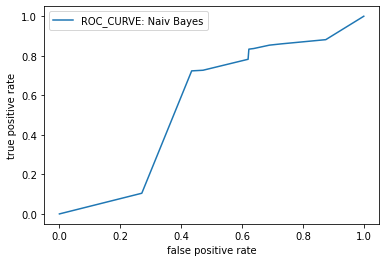

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(Y, A1, pos_label = 5)
plt.plot(fpr, tpr, label="ROC_CURVE: Naiv Bayes")
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.legend()

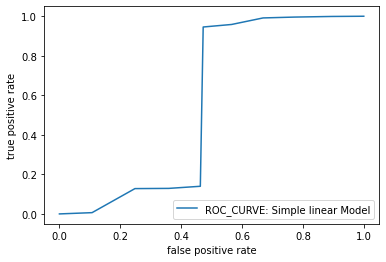

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(Y, A2, pos_label = 5)
plt.plot(fpr, tpr, label="ROC_CURVE: Simple linear Model")
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.legend()

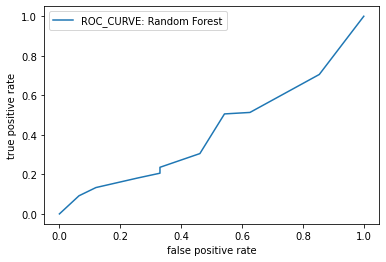

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(Y, A3, pos_label = 5)
plt.plot(fpr, tpr, label="ROC_CURVE: Random Forest")
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.legend()